## 1. Linear Regression on Boston Housing Dataset

### 1.1 Libraries used

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import zscore

### 1.2 Importing Dataset

In [3]:
url = "HousingData.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


### 1.3 Checking missing values

In [8]:
df.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [10]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,NaN,2.5050,1,273,21.0,396.90,7.88,11.9


### 1.4 Checking correlation between missing values

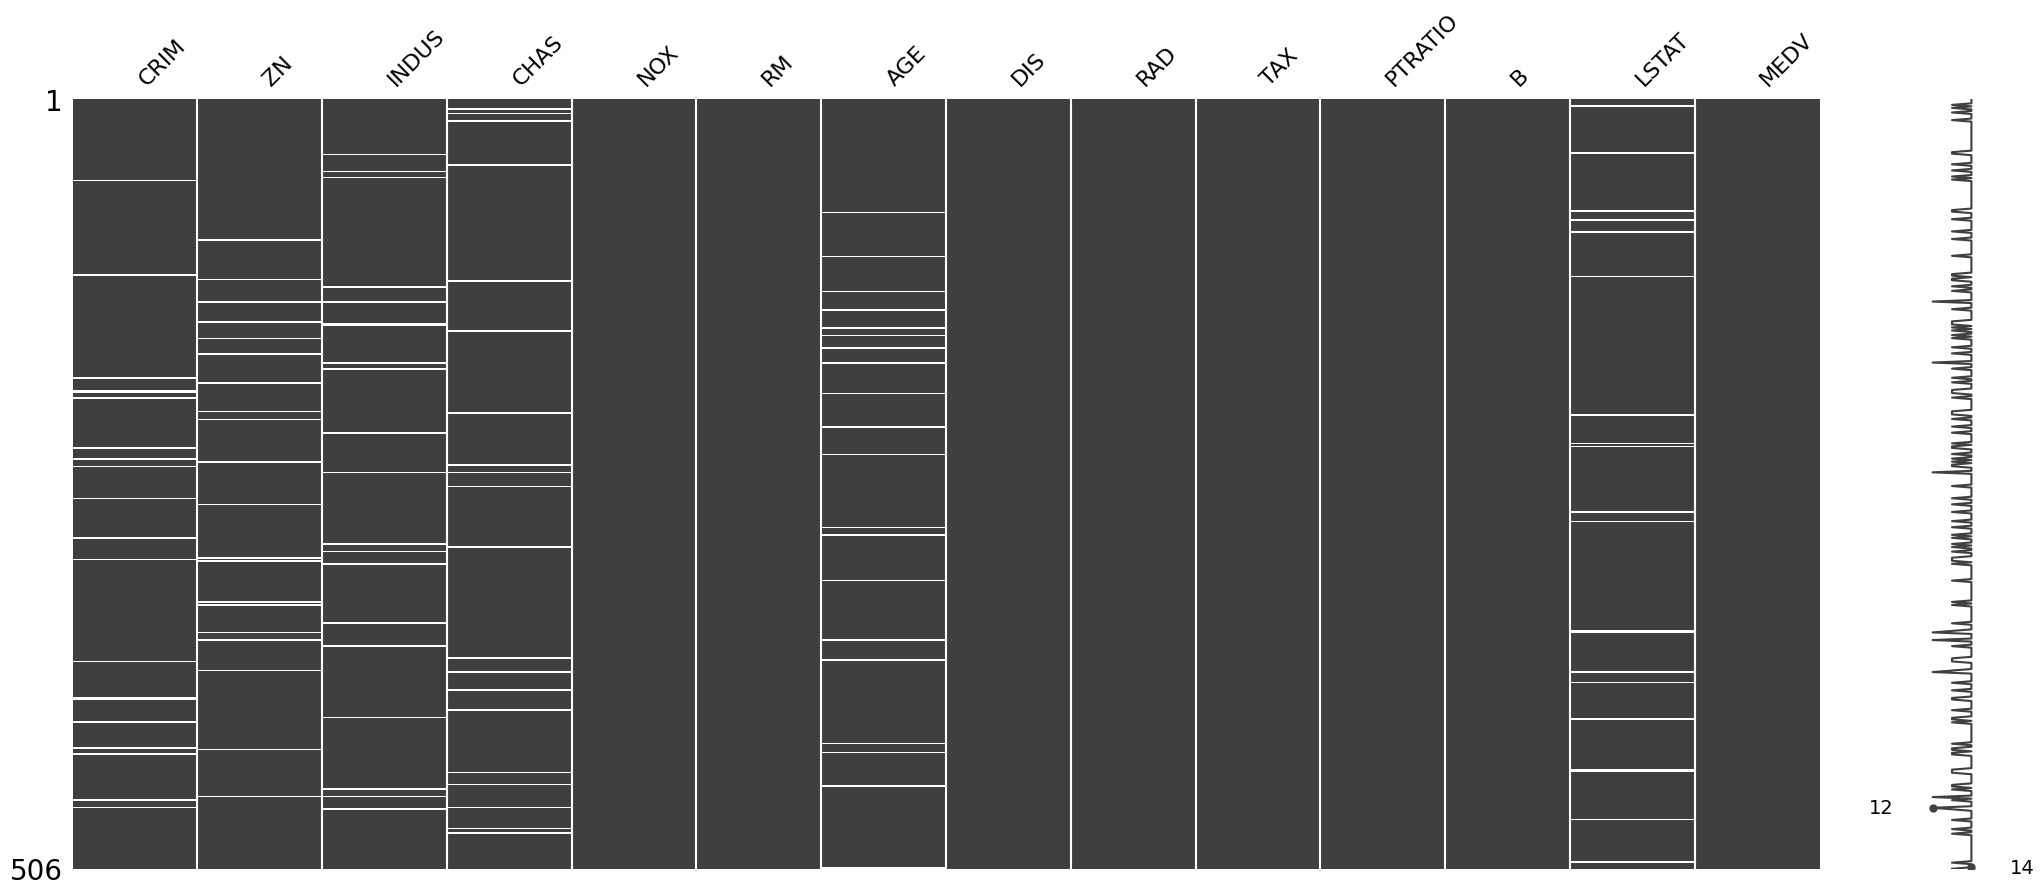

In [12]:
msno.matrix(df)
plt.show()

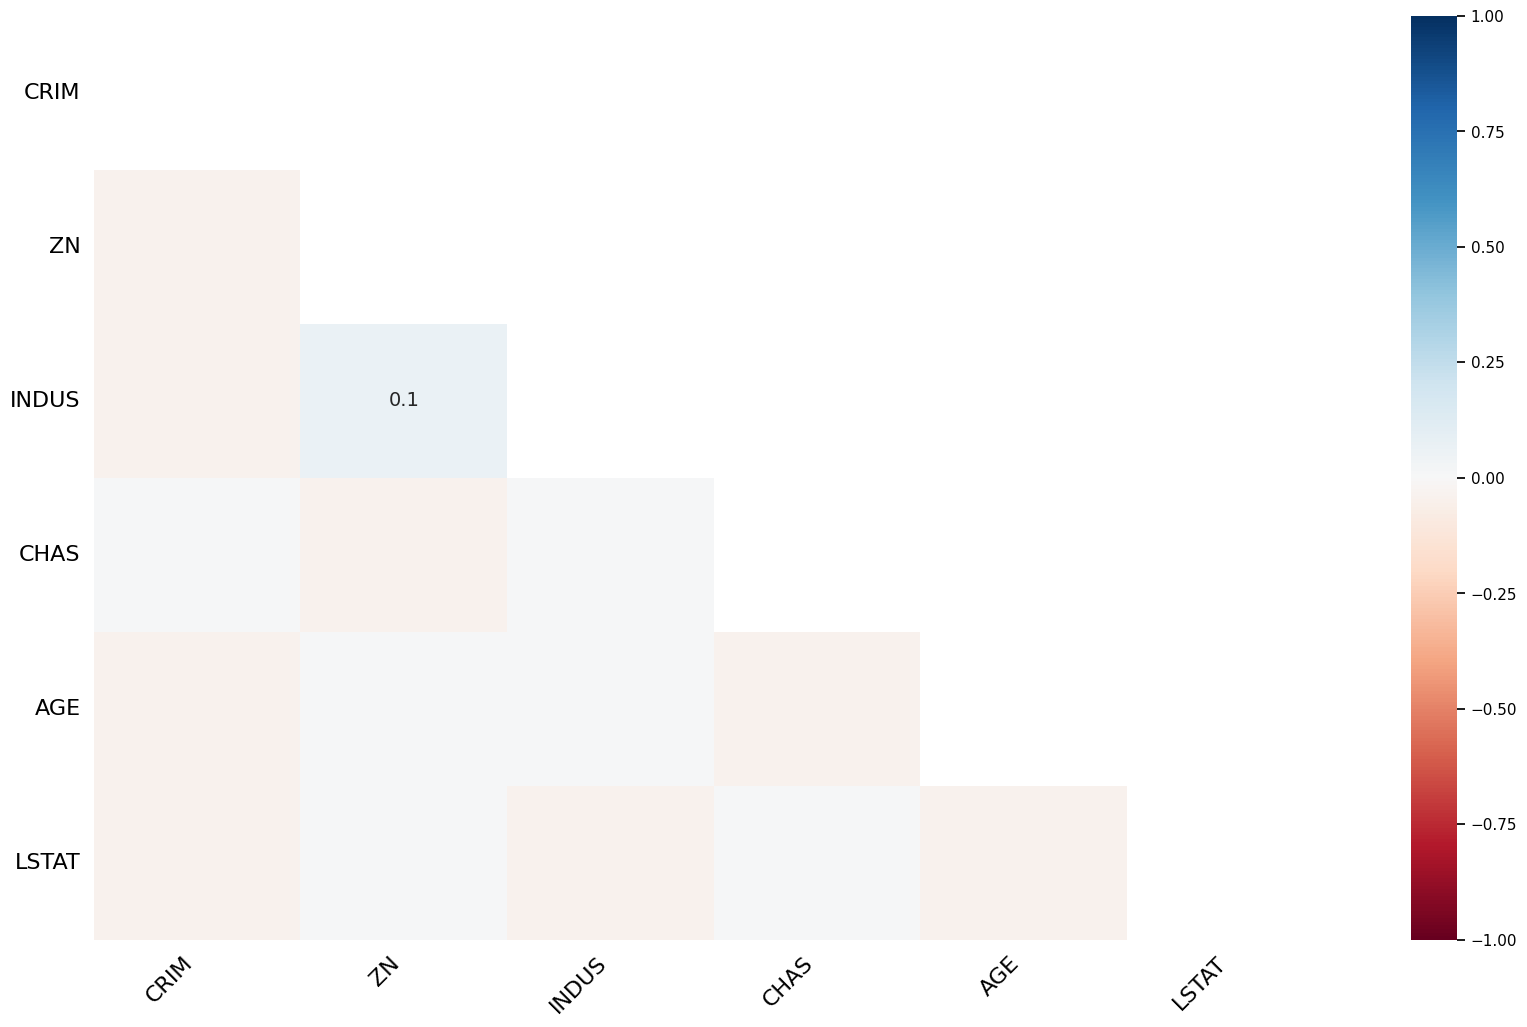

In [16]:
msno.heatmap(df)
plt.show()

### 1.5 Correlation matrix to find which features are related to MEDV

#### Only RM, LSTAT are select because these two features are closely related to MEDV, RM is positively correlated while 
#### LSTAT is negatively correlated

In [14]:
correlation_matrix = df.corr()
correlation_matrix['MEDV']

CRIM      -0.391363
ZN         0.373136
INDUS     -0.481772
CHAS       0.181391
NOX       -0.427321
RM         0.695360
AGE       -0.394656
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.735822
MEDV       1.000000
Name: MEDV, dtype: float64

### 1.6 Dealing with missing values

In [16]:
columns_to_impute = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'AGE', 'LSTAT']
subset_data = df[columns_to_impute]

In [18]:
imputer = KNNImputer(n_neighbors=3)
imputed_subset = imputer.fit_transform(subset_data)

In [20]:
df[columns_to_impute] = imputed_subset

In [22]:
df.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

### 1.7 Applying zscore to deal with outliers

In [28]:
df[['RM_zscore', 'LSTAT_zscore']] = df[['RM', 'LSTAT']].apply(zscore)

In [38]:
filtered_df = df[(df['RM_zscore'].abs() <= 3) & (df['LSTAT_zscore'].abs() <= 3)]

### 1.8 Checking if Outliers are removed or not

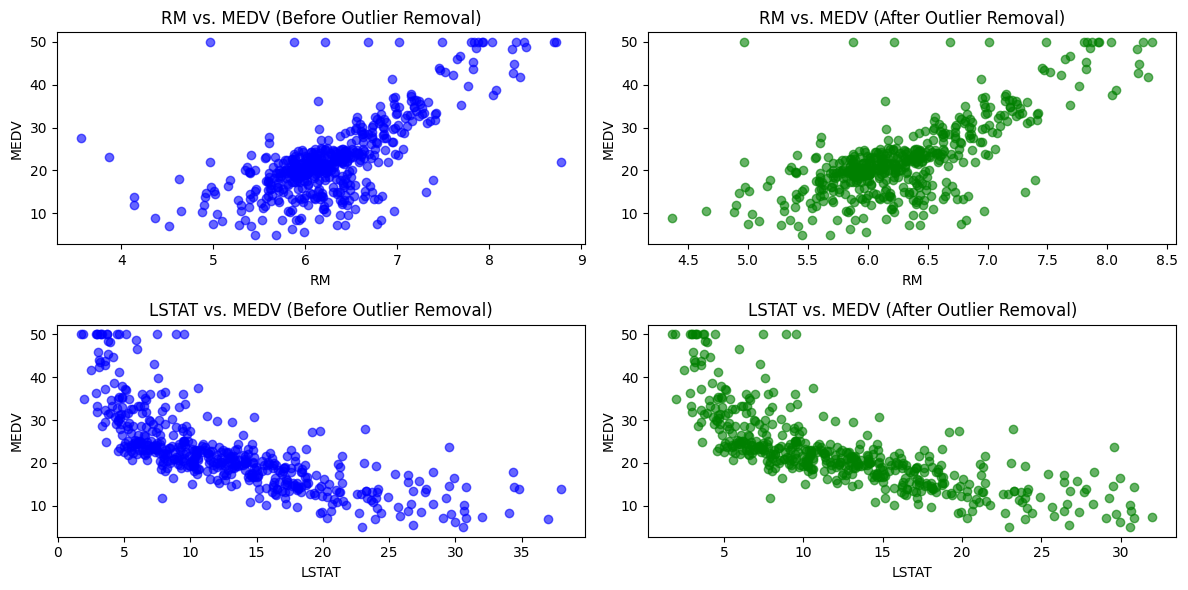

Original dataset size: (506, 16)
Filtered dataset size: (493, 16)


In [44]:
plt.figure(figsize=(12, 6))

# RMs vs. MEDV before filtering
plt.subplot(2, 2, 1)
plt.scatter(df['RM'], df['MEDV'], alpha=0.6, color='blue')
plt.title("RM vs. MEDV (Before Outlier Removal)")
plt.xlabel("RM")
plt.ylabel("MEDV")

# RM vs. MEDV after filtering
plt.subplot(2, 2, 2)
plt.scatter(filtered_df['RM'], filtered_df['MEDV'], alpha=0.6, color='green')
plt.title("RM vs. MEDV (After Outlier Removal)")
plt.xlabel("RM")
plt.ylabel("MEDV")

# LSTAT vs. MEDV before filtering
plt.subplot(2, 2, 3)
plt.scatter(df['LSTAT'], df['MEDV'], alpha=0.6, color='blue')
plt.title("LSTAT vs. MEDV (Before Outlier Removal)")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

# LSTAT vs. MEDV after filtering
plt.subplot(2, 2, 4)
plt.scatter(filtered_df['LSTAT'], filtered_df['MEDV'], alpha=0.6, color='green')
plt.title("LSTAT vs. MEDV (After Outlier Removal)")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")

plt.tight_layout()
plt.show()

print("Original dataset size:", df.shape)
print("Filtered dataset size:", filtered_df.shape)

### 1.9 Applying Linear Regression

In [54]:
X = filtered_df[['RM_zscore', 'LSTAT_zscore']]
y = filtered_df['MEDV']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 1.10 Checking R^2 and MSE for model's accuracy

In [64]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Squared Error: 13.82933200250596
R-squared: 0.7257268696157442


In [66]:
y_pred

array([15.21156496, 25.08929481, 26.48212613, 22.61343851, 21.89648628,
       21.33370945, 14.13620002, 33.54211685, 27.61462344, 17.96514235,
       22.0625187 , 33.08284993, 32.59876155, 30.66687443, 28.83245545,
       24.26062503, 21.82374078, 12.61365351, 22.33740741, 11.59886567,
       19.60538522, 33.74139791, 19.90853834, 25.87563444, 27.52539881,
       26.31475886, 11.56590832,  9.90238439, 23.23942627, 18.08120469,
       19.03925029, 22.97838285, 14.4030167 , 33.66052961, 27.29871145,
       23.16393233, 10.04939571, 28.80162019, 27.22202089, 16.61671428,
       34.24861076, 19.56643506, 15.30766238, 24.65331594, 29.33038124,
       20.48914313, 19.47192003, 21.93981011, 25.17769632, 32.00968671,
       20.46296584, 21.77972064, 20.79365297, 22.49582088, 18.15301336,
       21.380073  , 14.53743272, 27.53879624, 23.76739918, 32.84432042,
        6.48906588, 29.88177691, 17.65555643, 27.31482143, 19.85709261,
       20.01483166, 29.02267688, 27.23615396, 27.32565589, 29.17

### 1.11 Making Predictions

In [68]:
y_pred = model.predict(X_test)
new_data = [[0.5, -1.2]]
predicted_medv = model.predict(new_data)

C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [70]:
predicted_medv

array([30.22447082])